In [12]:
# 导入并加载数据
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import Series

df = pd.read_csv('store_data.csv')


In [3]:
# 探索数据
print(df.head())


         week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023


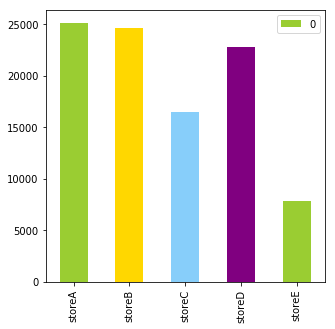

In [4]:
# 上个月的销售额

# 1.哪家商店上个月的总销售额最高？
import calendar

# 获取最大的日期就是相当于最后一个月
max_date = datetime.strptime(max(df["week"]), '%Y-%m-%d')
# print("max_date: " + str(max_date))

# 返回对应的月份是第几周和有多少天
month_range = calendar.monthrange(max_date.year, max_date.month)
# print("month_range: " + str(month_range))

# 当月的初始天数
start_date = datetime(max_date.year, max_date.month, 1)
# 当月的最后一天
end_date = datetime(max_date.year, max_date.month, month_range[1])

# 都转成字符串
start_date = datetime.strftime(start_date, '%Y-%m-%d')
end_date = datetime.strftime(end_date, '%Y-%m-%d')

# 通过loc获取指定范围的日期的数据
mask = df["week"].between(start_date, end_date)
data_of_month = df.loc[mask]
# print(data_of_month)

# 统计当月的和
sum_data_of_month = data_of_month.sum().to_frame()
# 删除表格的header
sum_data_of_month.drop(sum_data_of_month.index[0], inplace=True)


colors = ('yellowgreen', 'gold', 'lightskyblue', 'purple')
sum_data_of_month.plot(kind='bar', color=colors, figsize=(5, 5))

plt.show()

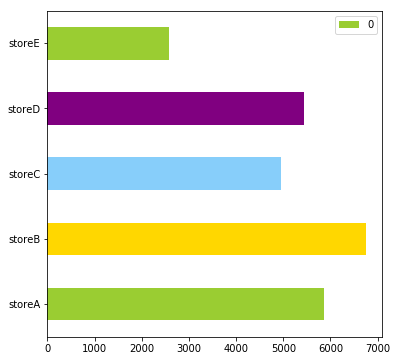

In [5]:
# 平均销售额
# 2.哪家商店的平均销售额最高？
# 获取基本统计信息
describing = df.describe()
# print(describing)

# 选取mean（平均数）这一行
mean_row = describing[1:2]
# 行转列
mean_list = mean_row.reset_index().T
# 去掉header
mean_list.drop(mean_list.index[0], inplace=True)

colors = ('yellowgreen', 'gold', 'lightskyblue', 'purple')
mean_list.plot(kind='barh', color=colors, figsize=(6, 6))

plt.show()

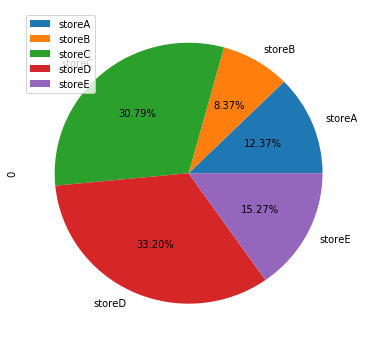

In [10]:
# 2016 年 3 月 13 日所在的那一周的销售额
# 3.哪家商店在 2016 年 3 月 13 日这个星期的销量最高？

# 取出3月7号到3月13号的数据
march_13_week = df.loc[df["week"].between("2016-03-07", "2016-03-13")]

# 求和后，将对象转成DataFrame
sum_of_march_13_week = march_13_week.sum().to_frame()
# 去掉header
sum_of_march_13_week.drop(sum_of_march_13_week.index[0], inplace=True)

# 饼图
sum_of_march_13_week.plot.pie(subplots=True, figsize=(6, 6), autopct='%.2f%%')
plt.show()


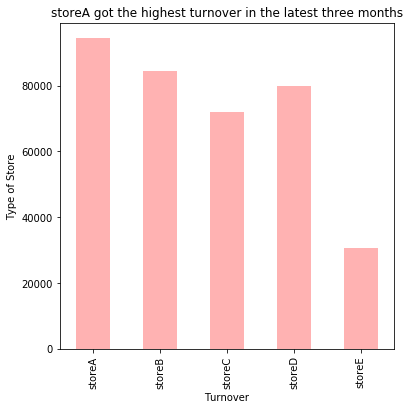

In [15]:
# 过去 3 个月的销售额
# 4.哪家商店在最近 3 个月内销量最高？
# 日期的月份相减
def month_subtract(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    return date.replace(day=d,month=m, year=y)

# 将字符串日期转换成datetime类型的日期
max_date = pd.to_datetime(max(df["week"]))
# 减去三个月就表示：三个月前到现在
min_date = month_subtract(max_date, -3)

# print("max_date: " + str(max_date))
# print("min_date: " + str(min_date))

# 将DataFrame的week字段的全部的值都编程datetime类型
df["week"] = pd.to_datetime(df["week"])

mask = (df["week"] >= min_date) & (df["week"] <= max_date)
three_month_list = df.loc[mask]
a = sum(three_month_list["storeA"])
b = sum(three_month_list["storeB"])
c = sum(three_month_list["storeC"])
d = sum(three_month_list["storeD"])
e = sum(three_month_list["storeE"])

store_list = [a, b, c, d, e]

result = Series(store_list, index=["storeA", "storeB", "storeC", "storeD", "storeE"])

plt.title("storeA got the highest turnover in the latest three months")
plt.xlabel("Turnover")
plt.ylabel("Type of Store")

result.plot(kind='bar', figsize=(6, 6), color='r', alpha=0.3)
plt.show()